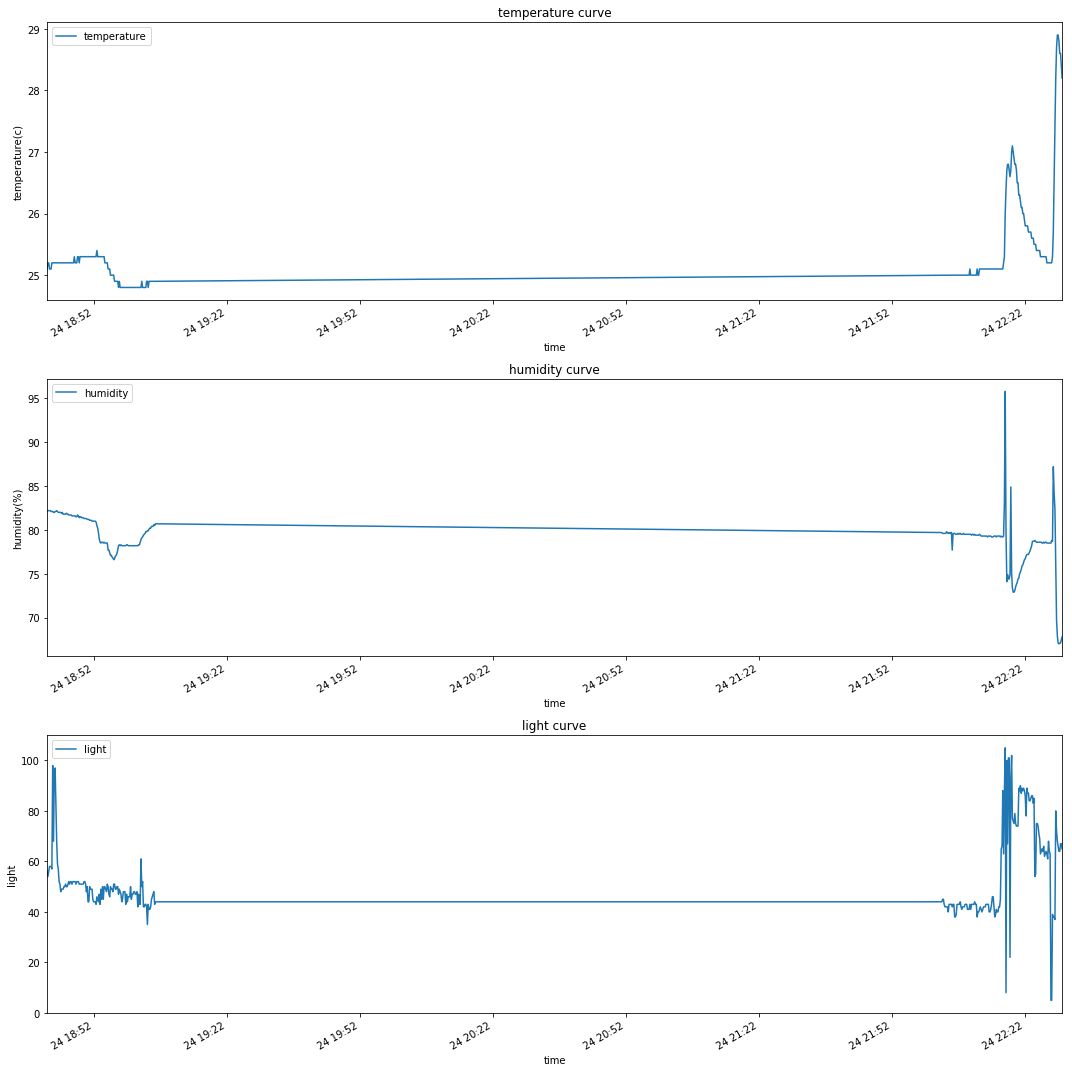

In [8]:
import boto3
import pandas as pd
from matplotlib import pyplot as plt

# create IoT Analytics client
client = boto3.client('iotanalytics')

#after running the code portion above run the code below with your own dataset


dataset = "analytics7688_sensing_dataset"
dataset_url = client.get_dataset_content(datasetName = dataset)['entries'][0]['dataURI']

# start working with the data

df = pd.read_csv(dataset_url)
df.time = pd.to_datetime(pd.to_numeric(df.time), format="%Y%m%d%H%M%S")
df.set_index(df.time, inplace=True)
df.sort_values('id', inplace=True)

fig, axes = plt.subplots(3, figsize=(15,15))
df.temperature.plot(ax=axes[0], legend=True)
df.humidity.plot(ax=axes[1], legend=True)
df.light.plot(ax=axes[2], legend=True)

axes[0].set_title("temperature curve") 
axes[0].set_ylabel("temperature(c)")
axes[0].set_xlabel("time")
axes[1].set_title("humidity curve") 
axes[1].set_ylabel("humidity(%)")
axes[1].set_xlabel("time")
axes[2].set_title("light curve") 
axes[2].set_ylabel("light")
axes[2].set_xlabel("time")

fig.tight_layout()
plt.show()

#print('Average Humidity: ', df.humidity.mean())
#print('Number of samples: ', len(df))

#print('Average temperature: ', df.temperature.mean())
#print('Number of samples: ', len(df))